# Instructions

Answer the questions and perform any additional analysis you think will help you understand what's going on in the data. You will be required to present your work, you can use this notebook or create slides based on your analysis. Whatever you’re comfortable with is fine with us.

The section headings below are only a guide and this notebook should be modified as you see fit.

# 1. Data processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

The information presented above shows that there are a number of null values in some cells

In [4]:
data.interpolate(method ='linear', limit_direction ='both', inplace=True)

The function below finds smallest and large values in 'Under15' column, stores them in two seperate lists and returns the result.

In [5]:
def country_stats():
    country_lowest_pop_U15 = list(data['Country'].loc[data['Under15'] == data['Under15'].min()])
    
    country_highest_pop_U15 = list(data['Country'].loc[data['Under15'] == data['Under15'].max()])
    
    return f"Country With Lowest Population Under15: {country_lowest_pop_U15[0]}. Country With Highest Population Under15: {country_highest_pop_U15[0]}"
country_stats()

'Country With Lowest Population Under15: Japan. Country With Highest Population Under15: Niger'

The function below finds values in specific index positions in various columns by region.                                       
- 'column' is name of the required column                                                                                   
- 'pos' and 'pos2' are index positions of the values being seeked                                                           
- 'region' contains the unique region names

In [6]:
def regional_stats(column, pos, pos2=None):
    regions = data['Region'].unique()
    sum_of_stats = []
    
    for i in regions:
        sum_of_stats.append(data[column].loc[data['Region'] == i].sum())
    
    sorted_sums = sorted(sum_of_stats)
    
    height = ''
    if pos2 != None:
        pos_one = sorted_sums[int(pos)]
        pos_two = sorted_sums[int(pos2)]
        
        region_one = regions[sum_of_stats.index(pos_one)]
        region_two = regions[sum_of_stats.index(pos_two)]
        
        
        if pos >= 0:
            height = 'lowest'
            return f'{region_one} and {region_two} have the {height} {column}'
        
        elif pos < 0:
            height = 'highest'
            return f'{region_one} and {region_two} have the {height} {column}'
        
    else:
        pos_one = sorted_sums[int(pos)]
        region_one = regions[sum_of_stats.index(pos_one)]
        
        if pos >= 0:
            height = 'lowest'
            return f'{region_one} has the {height} {column}'
        
        elif pos < 0:
            height = 'highest'
            return f'{region_one} has the {height} {column}'

The function below makes dictionary from various columns of region based data.                                             
- the 'column' arguement is the name of the required column                                                                  
- 'regions' contain the unique region names                                                                                               

In [7]:
def regional_analysis(column):
    regions = data['Region'].unique()
    temp = {}
    regional_stats = {}
    
    for i in regions:
        temp[i] = data[column].loc[data['Region'] == i].sum()
    
    regional_stats['Region'] = list(temp.keys())
    regional_stats[column] = list(temp.values())
    return regional_stats

The function below creates new DataFrame using dict passed in as arguement 
- 'dict_stats' is the dict that will be used to make DataFrame

In [8]:
def dataframe_from_dict(dict_stats):
    
    df = pd.DataFrame(dict_stats)
    return df

Region with the highest % of population over 60

In [9]:
regional_stats('Over60',-1)

'Europe has the highest Over60'

# 2. Exploratory data analysis

Below is a scatterplot represents the relationship between the GNI and Fertility rates per country, along with a regression line to represent its correlation.

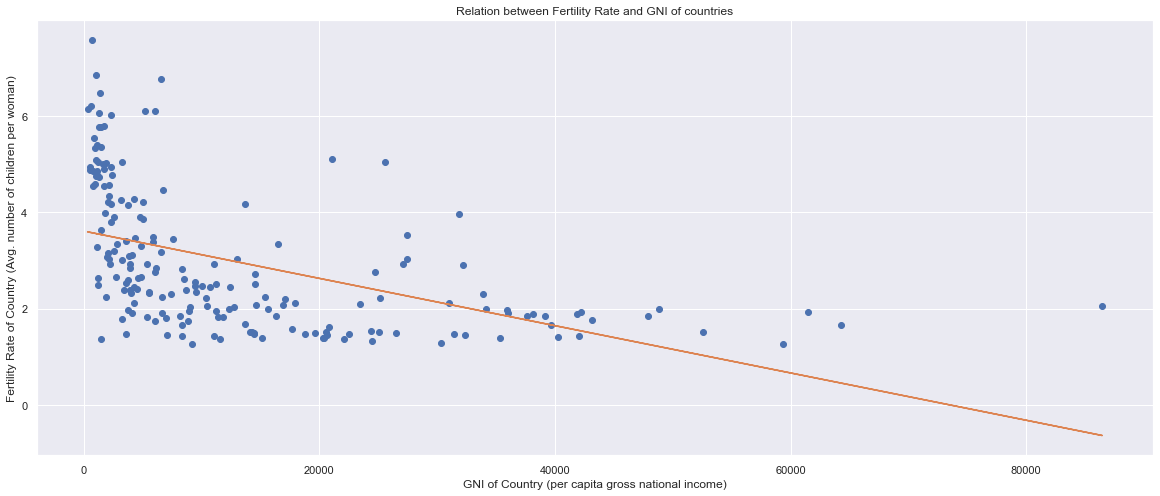

In [10]:
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.plot(data['GNI'], data['FertilityRate'], 'o')
_ = plt.xlabel("GNI of Country (per capita gross national income)")
_ = plt.ylabel("Fertility Rate of Country (Avg. number of children per woman)")
_ = plt.title("Relation between Fertility Rate and GNI of countries")

x = np.array(data['GNI'])
y = np.array(data['FertilityRate'])
a, b = np.polyfit(x, y, 1)

_ = plt.plot(x, a*x+b)
plt.show()

GNI and fertility rate do have a negatively correlated relationship, except for countries that have a fertility rate greater than or equal to 3 and GNI greater or equal to 20 000

'rel_diff_GNI_vs_Fert' stores the countries whose relationship between GNI and fertilty rate is not represented by regression line.

In [11]:
list(data['Country'].loc[(data['FertilityRate']<=3) & (data['GNI']<=20000)])

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 "Democratic People's Republic of Korea",
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guyana',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nauru',
 'Nepal',
 'Nicaragua',
 'Palau',
 'Panama',
 'Paraguay',
 'Peru',
 'Republic of Moldova',
 'Romania',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Serbia',
 'South Africa',
 'Sri Lanka',
 'Suriname',
 'Thailand',
 'The former Yugos

'region_lowest_litrates' stores the regions with the lowest literacy rates

In [12]:
regional_stats('LiteracyRate', 0,1)

'South-East Asia and Eastern Mediterranean have the lowest LiteracyRate'

'region_lowest_childmort' stores the regions with the lowest child mortality rates

In [13]:
regional_stats('ChildMortality', 0,1)

'South-East Asia and Europe have the lowest ChildMortality'

Below is a box plot represents the relationship of life expectancy across regions

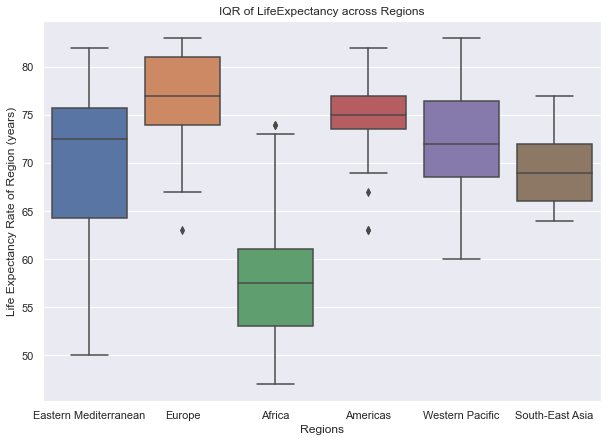

In [14]:
sns.set()
fig = plt.figure(figsize=(10, 7))
_ = sns.boxplot(x=data['Region'], y=data['LifeExpectancy'], data=data)
_ = plt.xlabel("Regions")
_ = plt.ylabel("Life Expectancy Rate of Region (years)")
_= plt.title("IQR of LifeExpectancy across Regions")
plt.show()

Although the data of the african region is lower than all the others, the median of the dataexcluding the African data is very high, the lowest one (South-East Asia) being just under age 70

Below regional data specific by the user, like 'GNI', are gathered and stored into their respective variables using the 'regional_analysis()' function. The gathered data are then used to make dataframes, which are storeed as well in their respective variables. 

In [15]:
GNI = regional_analysis('GNI')
gni_df = dataframe_from_dict(GNI)

LifeExpectancy = regional_analysis('LifeExpectancy')
life_exp_df = dataframe_from_dict(LifeExpectancy)

FertilityRate = regional_analysis('FertilityRate')
fert_rate_df = dataframe_from_dict(FertilityRate)

names = list(gni_df['Region'])
names.insert(0,'Regions')

The bar graph represents the relationship between life expectancy and GNI across regions.

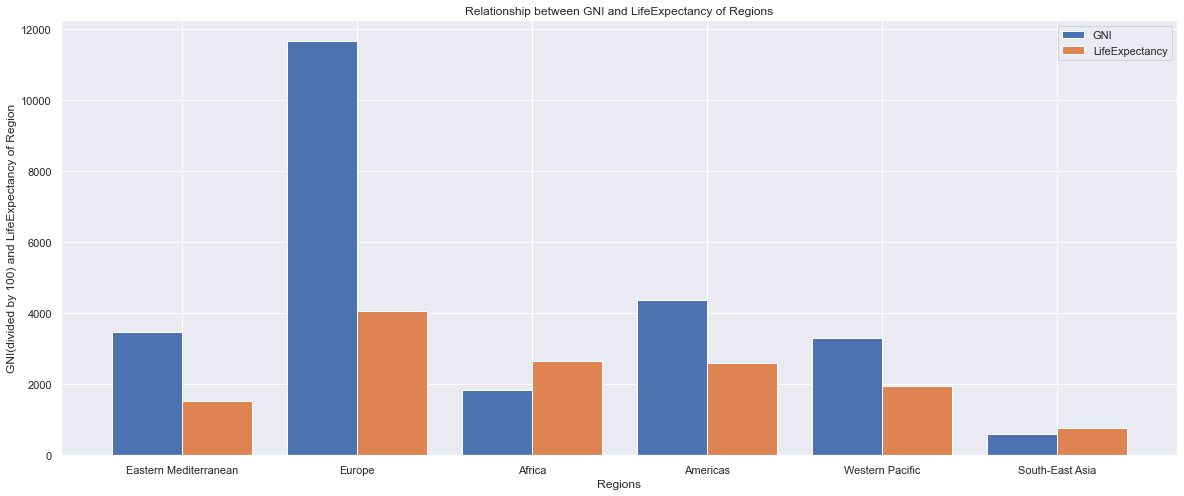

In [16]:
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
X_axis = np.arange(len(gni_df['Region']))
_= ax.bar(X_axis - 0.2, gni_df['GNI']/100, 0.4, label = 'GNI')
_= ax.bar(X_axis + 0.2, life_exp_df['LifeExpectancy'], 0.4, label = 'LifeExpectancy')
_= ax.set_title("Relationship between GNI and LifeExpectancy of Regions")
_= ax.set_xlabel('Regions')
_= ax.set_ylabel('GNI(divided by 100) and LifeExpectancy of Region')
_= ax.legend()
_= ax.xaxis.set_ticklabels(names)
plt.show()

Life expectancy and wealth across different regions, tend to have a weak posivitely correlated relationship. And the GNI is always significantly higher the the life expectancy rate of a given region, but this does not apply to the regions of Africa and South-East Asia, whose GNI is lower than their respective life expectancy rates.

The bar graph represents the relationship between fertility rate and GNI across regions

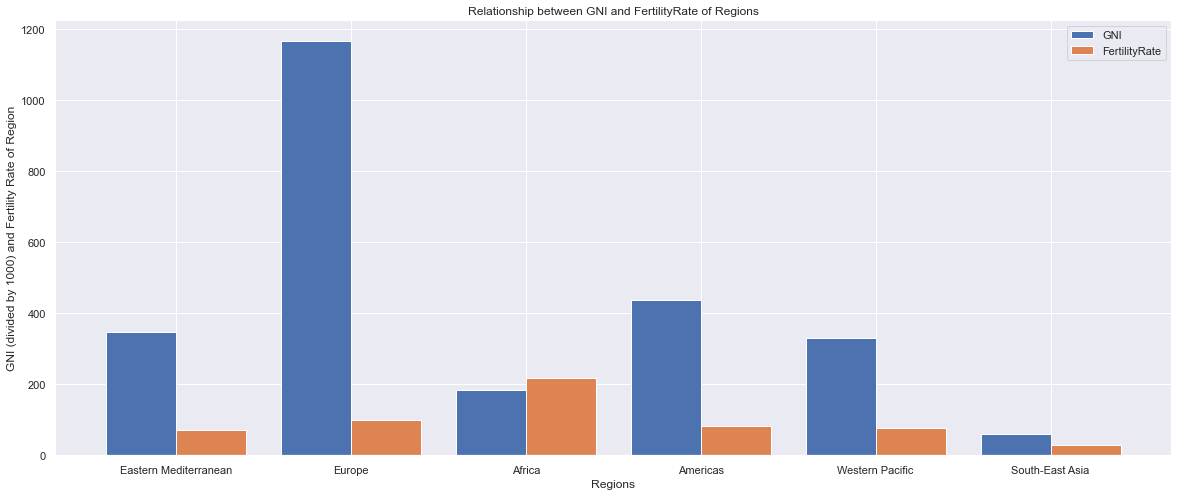

In [17]:
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
X_axis = np.arange(len(gni_df['Region']))
_= ax.bar(X_axis - 0.2, gni_df['GNI']/1000, 0.4, label = 'GNI')
_= ax.bar(X_axis + 0.2, fert_rate_df['FertilityRate'], 0.4, label = 'FertilityRate')
_= ax.set_title("Relationship between GNI and FertilityRate of Regions")
_= ax.set_xlabel('Regions')
_= ax.set_ylabel('GNI (divided by 1000) and Fertility Rate of Region')
_= ax.legend()
_= ax.xaxis.set_ticklabels(names)
plt.show()

Life expectancy and fertility rate across different regions, tend to have a posivitely correlated relationship. Although again Africa is the expection, whose GNI is lower than its fertility rate, like it is its life expectancy rate.

Below regional data specific by the user, like 'GNI', are gathered and stored into their respective variables using the 'regional_analysis()' function. The gathered data are then used to make dataframes, which are storeed as well in their respective variables. 

In [18]:
LiteracyRate = regional_analysis('LiteracyRate')
lit_rate_df = dataframe_from_dict(dataframe_from_dict(LiteracyRate))

The bar graph represents the relationship between life expectancy and literacy rates across regions

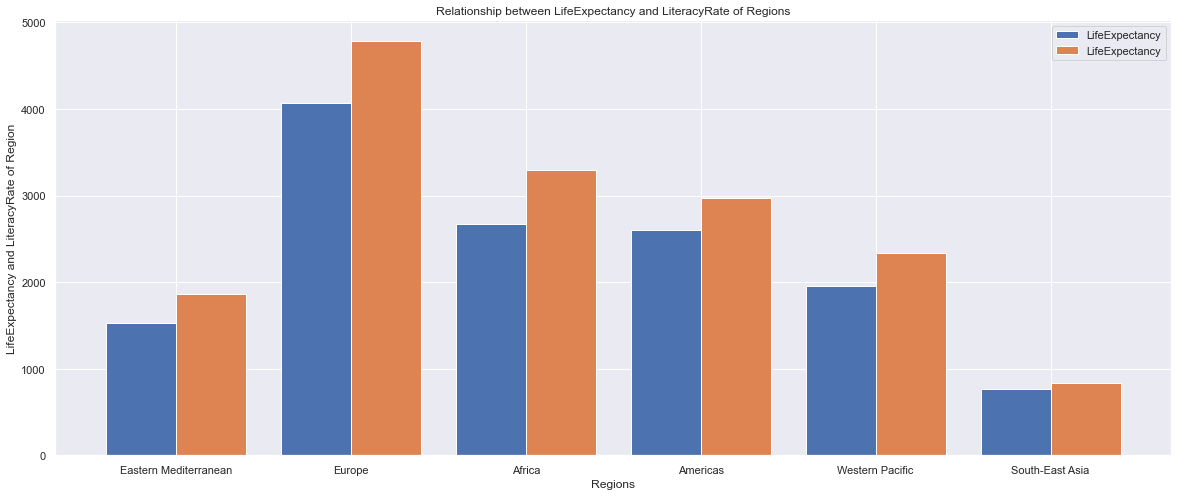

In [19]:
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
X_axis = np.arange(len(gni_df['Region']))
_= ax.bar(X_axis - 0.2, life_exp_df['LifeExpectancy'], 0.4, label = 'LifeExpectancy')
_= ax.bar(X_axis + 0.2, lit_rate_df['LiteracyRate'], 0.4, label = 'LifeExpectancy')
_= ax.set_title("Relationship between LifeExpectancy and LiteracyRate of Regions")
_= ax.set_xlabel('Regions')
_= ax.set_ylabel('LifeExpectancy and LiteracyRate of Region')
_= ax.legend()
_= ax.xaxis.set_ticklabels(names)
plt.show()

The relationsips between GNI and life expectancy and GNI and fertility across different 
regions are positively correlated. This applies to african countries as well

In the cell below, I create a dictionary with the life expectancy and literacy rates stats of the 'Africa' region, and then create a dataframe using that dictionary.

In [20]:
africa_dict = {}

africa_dict['African Countries'] = list(data["Country"].loc[data['Region']=='Africa'])
africa_dict['LifeExpectancy'] = list(data['LifeExpectancy'].loc[data['Region']=='Africa'])
africa_dict['LiteracyRate'] = list(data["LiteracyRate"].loc[data["Region"]=="Africa"])

africa_df = dataframe_from_dict(africa_dict)
country_names = list(africa_df['African Countries'])
country_names.insert(0,'Countries')

The scatterplot represents the relationship between life expectancy and literacy rates across african countries, along with a regression line to represent its correlation.

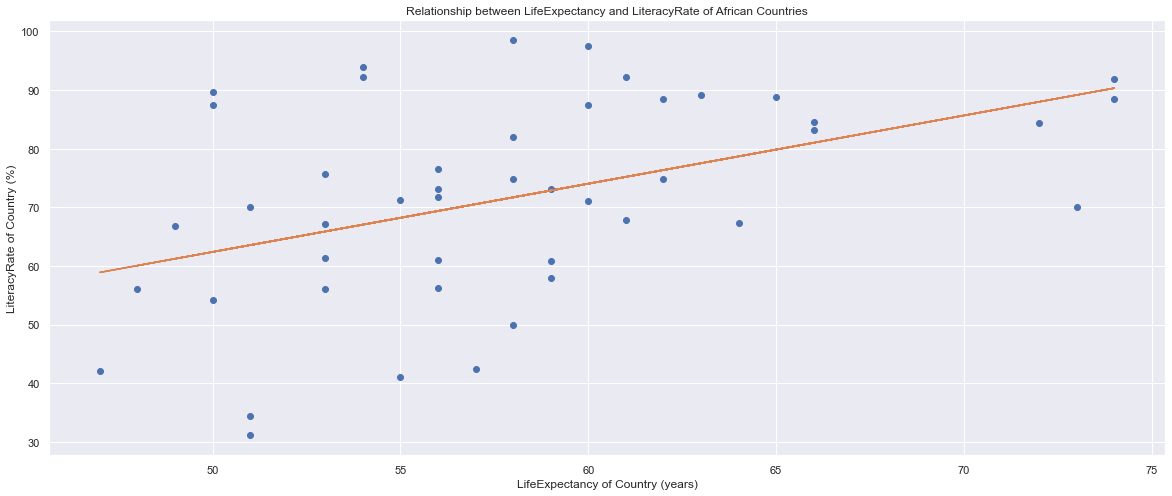

In [21]:
sns.set()
f, ax = plt.subplots(figsize=(20, 8))
_ = plt.plot(africa_dict['LifeExpectancy'], africa_dict['LiteracyRate'], 'o')
_= ax.set_title("Relationship between LifeExpectancy and LiteracyRate of African Countries")
_= ax.set_xlabel('LifeExpectancy of Country (years)')
_= ax.set_ylabel('LiteracyRate of Country (%)')

x = np.array(africa_dict['LifeExpectancy'])
y = np.array(africa_dict['LiteracyRate'])
a, b = np.polyfit(x, y, 1)

_ = plt.plot(x, a*x+b)
plt.show()

The relationsips between literacy and life expectancy rates different 
          regions and across african countries are positively correlated. The relationships represented are valid

# 3. Conclusion and insights 

From the eda above, I have found that the wealth of a country or region seems to have the biggest influence on the rest of the data collected, life expectancy, fertility rate, etc. From the findings, it seems as though countries benefit from high wealth, their life expectancy rates, child mortality rates, and literacy rates tend to be higher, which makes sense that a wealthy country would maintain relatively good wealth and more than acceptable education standards. And of course, a low GNI would result in health and education standards to depreciate. Although fertility rates seem to depreciate in the face of good wealth. In conclusion, regions such as Europe and the Americas look as if they have it good, where unemployment rates and costs of living are low, and the less wealthy regions such as Africa and South-East Asia are places where poverty is a huge issue.